## **BALANCING EXPLORATION AND EXPLOTATION**

* **Training with random actions**
    - Agent explores environment
    - No strategy optimization based on learned knowledge
    - Agent uses knowledge when training done


### **Exploration-Exploitation trade-off**
* Balances exploration and exploitation
* Continious exploration prevents strategy refinement
* Exclusive exploitation misses undiscovered opportunites


### **Epsilon-greedy Strategy**
* Explore with probablity epsilon
* Exploit with probablity 1-epslion
* Ensures continous exploration while using knowledge\
![image](4.png)

### **Decayed epsilon-greedy strategy**
* Reduces epsilon over time
* More exploration initially allowing the agent to gather more information about environment
* More exploitation later on
* Agent increasingly relies on its accumulated knowledge

## **Implementation with Frozen Lake**

In [10]:
import numpy as np
import gymnasium as gym

In [11]:
#creating a frozen lake environment
env=gym.make('FrozenLake-v1',is_slippery=True)
action_size=env.action_space.n
state_size=env.observation_space.n

In [12]:
epsilon=0.9
rewards_eps_greedy=[]

In [13]:
def update_q_table(state, action, reward, next_state):
    old_value = Q[state, action]
    next_max = np.max(Q[next_state])
    return (1 - alpha) * old_value + alpha * (reward + gamma * next_max)

In [14]:
Q=np.zeros((state_size,action_size))#2d numpy array with intialized values to zero
alpha=0.1
gamma=0.9
total_episodes=10000
def epsilon_greedy(state):
    if np.random.rand() < epsilon:
        action=env.action_space.sample()#explore
    else:
        action=np.argmax(Q[state,:])#Exploit
    return action




In [15]:
for episode in range(total_episodes):
    state,info=env.reset()
    terminated=False
    episode_reward=0
    while not terminated:
        action=epsilon_greedy(state)
        new_state,reward,terminated,truncated,info=env.step(action)
        Q[state,action]=update_q_table(state,action,reward,new_state)
        state=new_state
        episode_reward+=reward
    rewards_eps_greedy.append(episode_reward)    

In [16]:
epsilon=1.0#exploration rate
epsilon_decay=0.999
min_epsilon=0.01
rewards_decay_eps_greedy=[]
for episode in range(total_episodes):
    state,info=env.reset()
    terminated=False
    episode_reward=0
    while not terminated:
        action=epsilon_greedy(state)
        new_state,reward,terminated,truncated,info=env.step(action)
        episode_reward+=reward
        Q[state,action]=update_q_table(state,action,reward,new_state)
        state=new_state
    rewards_decay_eps_greedy.append(episode_reward)  
    epsilon=max(min_epsilon,epsilon*epsilon_decay)  

In [17]:
avg_eps_greedy=np.mean(rewards_eps_greedy)
avg_decay=np.mean(rewards_decay_eps_greedy)

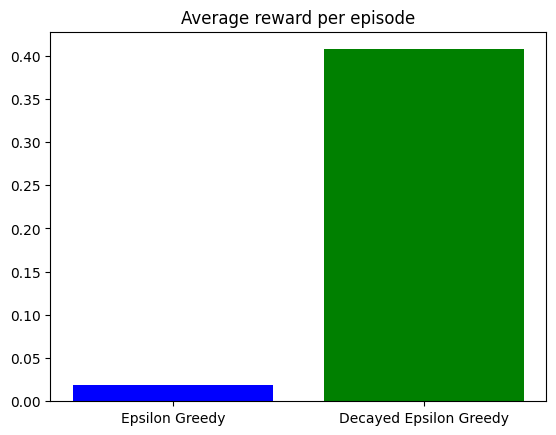

In [18]:
import matplotlib.pyplot as plt
plt.bar(['Epsilon Greedy','Decayed Epsilon Greedy'],[avg_eps_greedy,avg_decay],color=['blue','green'])
plt.title('Average reward per episode')
plt.show()